# Load data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.



# Preprocess data

In [3]:
data_path = "online_retail_listing.csv"
data = pd.read_csv(data_path ,delimiter=';',encoding="latin-1")
data = data.copy()
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


In [4]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [6]:
data = data.dropna(subset=['Customer ID'])

In [7]:
data["Quantity"] = data["Quantity"].astype(int)

In [8]:
data["Price"] = data["Price"].str.replace(",",".")
data["Price"] = data["Price"].astype(float)

In [9]:
data['Quantity'] = data['Quantity'].abs()

In [10]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)

In [11]:
# there are canceled orders, separate them and also check if there are other type of orders
str_inv = data[data["Invoice"].apply(str.isdigit) == False]  
str_inv["Invoice"].apply(lambda x: x[0]!='C').sum()
#delete rows where the order is canceled 
data =  data[data["Invoice"].apply(str.isdigit) == True]

In [12]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-01-12 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-01-12 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-01-12 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-01-12 07:46:00,3.75,13085.0,United Kingdom


In [13]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [14]:
data["ItemTotalPrice"] = data.Quantity * data.Price

In [15]:
data.describe()

,Quantity,Price,Customer ID,ItemTotalPrice
count,793380.000000,793380.000000,793380.000000,793380.000000
mean,13.221014,3.214344,15331.894511,21.836865
std,113.376231,29.363135,1696.362302,122.834624
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13979.000000,4.950000
50%,5.000000,1.950000,15271.000000,11.900000
75%,12.000000,3.750000,16801.000000,19.500000
max,74215.000000,10953.500000,18287.000000,77183.600000


In [16]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,ItemTotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-04-12 13:00:00,8.25,14546.0,United Kingdom,16.50
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-04-12 13:00:00,4.95,14546.0,United Kingdom,14.85
1048572,580502,22469,HEART OF WICKER SMALL,3,2011-04-12 13:15:00,1.65,16931.0,United Kingdom,4.95
1048573,580502,23489,VINTAGE BELLS GARLAND,2,2011-04-12 13:15:00,2.89,16931.0,United Kingdom,5.78


## Detect outliers and delete them

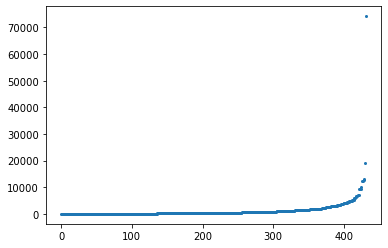

In [17]:
quant_unique = np.sort(data["Quantity"].unique())
plt.scatter(np.arange(len(quant_unique)), quant_unique, s = 4)

In [18]:
data = data.sort_values(by='Quantity', ascending=False)


In [19]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,ItemTotalPrice
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark,1915.2
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark,1296.0
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark,1296.0
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark,1274.4


In [20]:
data = data.iloc[2:,:]
data.reset_index(drop=True)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,ItemTotalPrice
0,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark,1296.00
1,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark,1296.00
2,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark,1274.40
3,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.00
4,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark,1248.00
...,...,...,...,...,...,...,...,...,...
793373,563917,22624,IVORY KITCHEN SCALES,1,2011-08-21 13:46:00,8.50,14572.0,United Kingdom,8.50
793374,523659,22753,SMALL YELLOW BABUSHKA NOTEBOOK,1,2010-09-23 13:54:00,0.85,18096.0,United Kingdom,0.85
793375,523659,17165D,ASS COL LARGE SAND FROG P'WEIGHT,1,2010-09-23 13:54:00,1.05,18096.0,United Kingdom,1.05
793376,523659,17165B,ASS COL LARGE SAND GECKO P'WEIGHT,1,2010-09-23 13:54:00,1.05,18096.0,United Kingdom,1.05


# Visualise data


In [21]:
country_freq = data.groupby('Country').size()
sorted_freq = country_freq.sort_values(ascending=False)
freq_df = sorted_freq.to_frame()
freq_df.columns = ["Country frequency"]
freq_df.reset_index(inplace=True, drop= False)

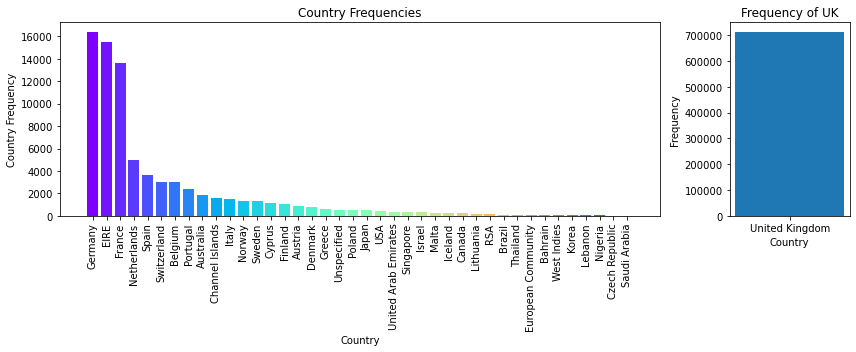

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Generate unique colors for each country
num_colors = len(freq_df) - 1
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

fig = plt.figure(figsize=(12, 5))

# Define the grid specification with 2 columns and different width ratios
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])

# Add the first subplot to the left with the original width
ax1 = plt.subplot(gs[0])

# Create the bar plot for country frequencies
ax1.bar(range(len(freq_df) - 1), freq_df["Country frequency"][1:], color=colors)

# Customize x-axis ticks and labels
ax1.set_xticks(range(len(freq_df) - 1))
ax1.set_xticklabels(freq_df.Country[1:], rotation='vertical')

# Add a legend with country names and corresponding colors
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(num_colors)]

# Set labels and title for the first subplot
ax1.set_xlabel('Country')
ax1.set_ylabel('Country Frequency')
ax1.set_title('Country Frequencies')

# Add the second subplot to the right with a different width
ax2 = plt.subplot(gs[1])

# Create the bar plot for the frequency of the UK
ax2.bar(freq_df["Country"][0], freq_df["Country frequency"][0], width=0.6)  # Adjust the width as desired

# Set labels and title for the second subplot
ax2.set_xlabel('Country')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of UK')

# Adjust the spacing between subplots if needed
plt.tight_layout()

# Show the plot
plt.show()


# RFM analysis

In [23]:
anchor_date = pd.Timestamp(year=2011, month=12, day=11)

RFM_df = data.groupby("Customer ID").agg({'InvoiceDate': lambda x : (anchor_date - x.max()).days,
                            'Customer ID': lambda x: len(x), # Frequency
                    "ItemTotalPrice": lambda x : x.sum()})


In [24]:
RFM_df

,InvoiceDate,Customer ID,ItemTotalPrice
Customer ID,,,
12346.0,530,33,372.86
12347.0,40,242,5408.50
12348.0,76,51,2019.40
12349.0,19,175,4428.69
12350.0,311,17,334.40
...,...,...,...
18283.0,10,936,2528.65
18284.0,609,28,461.68
18285.0,661,12,427.00


In [25]:
RFM_df.rename(columns = {"InvoiceDate":"Recency","Customer ID":"Frequency", "ItemTotalPrice":"Monetary"}, inplace = True)

In [26]:
RFM_df.index = RFM_df.index.astype(int)

In [27]:
RFM_df.reset_index(drop=False, inplace=True)

In [28]:
RFM_df

,Customer ID,Recency,Frequency,Monetary
0,12346,530,33,372.86
1,12347,40,242,5408.50
2,12348,76,51,2019.40
3,12349,19,175,4428.69
4,12350,311,17,334.40
...,...,...,...,...
5858,18283,10,936,2528.65
5859,18284,609,28,461.68
5860,18285,661,12,427.00
5861,18286,477,67,1296.43


##  K Mean Clustering

 optimal number of clusters with silhoette_score 


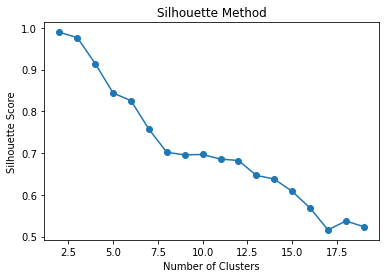

Optimal number of clusters: 2


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Define range of cluster numbers to evaluate
cluster_range = range(2, 20)

X =  RFM_df.loc[:,["Recency","Frequency","Monetary"]] 
# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Apply k-means clustering for each number of clusters and calculate silhouette score
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Find the optimal number of clusters with the highest silhouette score
optimal_num_clusters = cluster_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_num_clusters)


choosing optimal number of clusters using elbow method


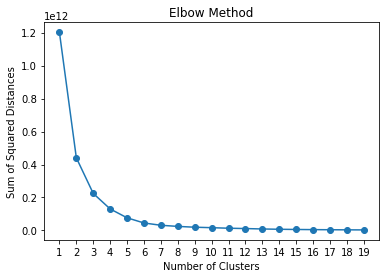

In [30]:
from sklearn.cluster import KMeans

cluster_range = range(1, 20)
cluster_data = RFM_df.loc[:,["Recency","Frequency","Monetary"]]
# Initialize an empty list to store the values of the sum of squared distances
ssd = []
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(cluster_data)
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.xticks(cluster_range)
plt.show()



clustering using number of selected clusters


In [31]:
num_of_clusters = 4
kmeans = KMeans(n_clusters=num_of_clusters)

# Fit the data to the K-means model
kmeans.fit(cluster_data)

# Get the cluster labels assigned to each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centroids = kmeans.cluster_centers_

# Print the cluster labels and centroids
print("Cluster Labels:", labels)
print("Cluster Centers:", centroids)


Cluster Labels: [0 0 0 ... 0 0 0]
Cluster Centers: [[2.15107428e+02 1.16288094e+02 1.88915449e+03]
 [7.00000000e+00 2.40150000e+03 5.57105305e+05]
 [9.66666667e+00 2.46458333e+03 1.74974902e+05]
 [4.69310345e+01 1.02239080e+03 3.61679961e+04]]


In [32]:
RFM_df["K Mean cluster"] = labels

In [33]:
RFM_df

,Customer ID,Recency,Frequency,Monetary,K Mean cluster
0,12346,530,33,372.86,0
1,12347,40,242,5408.50,0
2,12348,76,51,2019.40,0
3,12349,19,175,4428.69,0
4,12350,311,17,334.40,0
...,...,...,...,...,...
5858,18283,10,936,2528.65,0
5859,18284,609,28,461.68,0
5860,18285,661,12,427.00,0
5861,18286,477,67,1296.43,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Monetary values for each cluster'}, xlabel='Customer ID', ylabel='Monetary'>

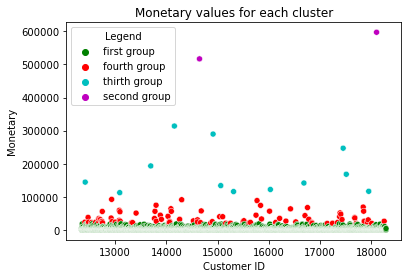

In [36]:
import seaborn as sns
plt.title("Monetary values for each cluster")

RFM_df['Legend'] = RFM_df['K Mean cluster'].map({0:'first group', 
           1:'second group',
           2:'thirth group', 
           3:'fourth group'})
sns.scatterplot(RFM_df["Customer ID"],RFM_df["Monetary"], hue = RFM_df['Legend'], palette = ['g', 'r', 'c', 'm'])

In [37]:
cluster_values= RFM_df.groupby("K Mean cluster").mean()

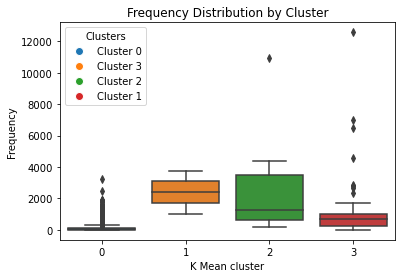

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the "Monetary" values across all clusters
sns.boxplot(x="K Mean cluster", y="Frequency", data=RFM_df)

# Get unique cluster labels
cluster_labels = RFM_df["K Mean cluster"].unique()

# Create legend handles and labels
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[i], markersize=8) for i in range(len(cluster_labels))]
legend_labels = ['Cluster {}'.format(label) for label in cluster_labels]

# Add legend
plt.legend(legend_handles, legend_labels, title="Clusters")

plt.title("Frequency Distribution by Cluster")
plt.show()


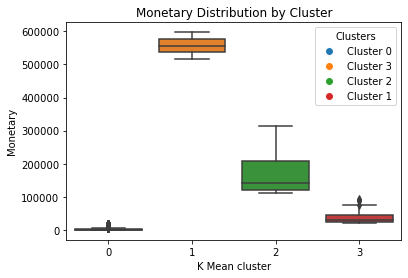

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="K Mean cluster", y="Monetary", data=RFM_df)

# Get unique cluster labels
cluster_labels = RFM_df["K Mean cluster"].unique()

# Create legend handles and labels
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[i], markersize=8) for i in range(len(cluster_labels))]
legend_labels = ['Cluster {}'.format(label) for label in cluster_labels]

# Add legend
plt.legend(legend_handles, legend_labels, title="Clusters")

plt.title("Monetary Distribution by Cluster")
plt.show()


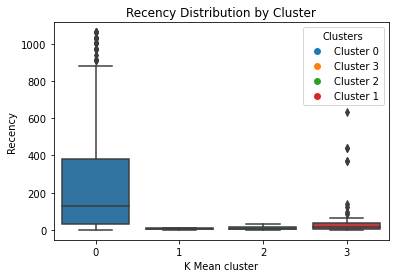

In [40]:
sns.boxplot(x="K Mean cluster", y="Recency", data=RFM_df)

# Get unique cluster labels
cluster_labels = RFM_df["K Mean cluster"].unique()

# Create legend handles and labels
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[i], markersize=8) for i in range(len(cluster_labels))]
legend_labels = ['Cluster {}'.format(label) for label in cluster_labels]

# Add legend
plt.legend(legend_handles, legend_labels, title="Clusters")

plt.title("Recency Distribution by Cluster")
plt.show()


divide Recency, Frequency, Monetary values into categories

In [42]:
quartiles = RFM_df[["Recency", "Frequency","Monetary"]] .quantile(q=[0.25,0.50,0.75])
quartiles

,Recency,Frequency,Monetary
0.25,30.0,21.0,344.000
0.50,121.0,53.0,880.640
0.75,380.0,141.0,2281.395


In [43]:
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1    
    

In [44]:
rfmSeg = RFM_df
rfmSeg['R_Quartile'] = rfmSeg['Recency'].apply(RClass, args=('Recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['Frequency'].apply(FMClass, args=('Frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['Monetary'].apply(FMClass, args=('Monetary',quartiles,))

In [49]:
del rfmSeg["Legend"]

In [57]:
rfmSeg

,Customer ID,Recency,Frequency,Monetary,K Mean cluster,R_Quartile,F_Quartile,M_Quartile,RFM_score
0,12346,530,33,372.86,0,4,3,3,433
1,12347,40,242,5408.50,0,2,1,1,211
2,12348,76,51,2019.40,0,2,3,2,232
3,12349,19,175,4428.69,0,1,1,1,111
4,12350,311,17,334.40,0,3,4,4,344
...,...,...,...,...,...,...,...,...,...
5858,18283,10,936,2528.65,0,1,1,1,111
5859,18284,609,28,461.68,0,4,3,3,433
5860,18285,661,12,427.00,0,4,4,3,443
5861,18286,477,67,1296.43,0,4,2,2,422


calculate RFM score

In [56]:
rfmSeg['RFM_score'] = rfmSeg[['R_Quartile', 'F_Quartile', 'M_Quartile']].astype(str).agg(''.join, axis=1)

In [63]:
rfmSeg.groupby("RFM_score").agg({"Recency":"mean","Frequency":"mean","Monetary":"mean"}).plot
                                 

,Recency,Frequency,Monetary
RFM_score,,,
111,13.522581,556.280645,14625.953185
112,16.198198,252.126126,1518.211261
113,20.000000,173.368421,733.859474
121,14.060606,102.969697,4908.919394
122,15.545894,89.072464,1508.381981
123,18.000000,91.214286,601.532286
124,15.900000,91.200000,290.333000
131,14.000000,40.071429,4593.882143
132,14.684211,42.105263,1269.060351


In [60]:
rfmSeg.sort_values("RFM_score")

,Customer ID,Recency,Frequency,Monetary,K Mean cluster,R_Quartile,F_Quartile,M_Quartile,RFM_score
5862,18287,0,155,4182.99,0,1,1,1,111
2669,15051,3,290,3935.16,0,1,1,1,111
2668,15050,26,156,4193.79,0,1,1,1,111
4344,16746,2,953,17616.48,0,1,1,1,111
2664,15046,10,406,7812.39,0,1,1,1,111
...,...,...,...,...,...,...,...,...,...
5358,17778,662,10,197.70,0,4,4,4,444
2658,15040,542,1,7.49,0,4,4,4,444
2674,15056,521,7,133.45,0,4,4,4,444
2611,14993,564,10,36.13,0,4,4,4,444


## Visualization of groups using RFM scoring obtained by concatenation

Text(0.5, 1.0, 'Mean Recency for Each RFM Score')

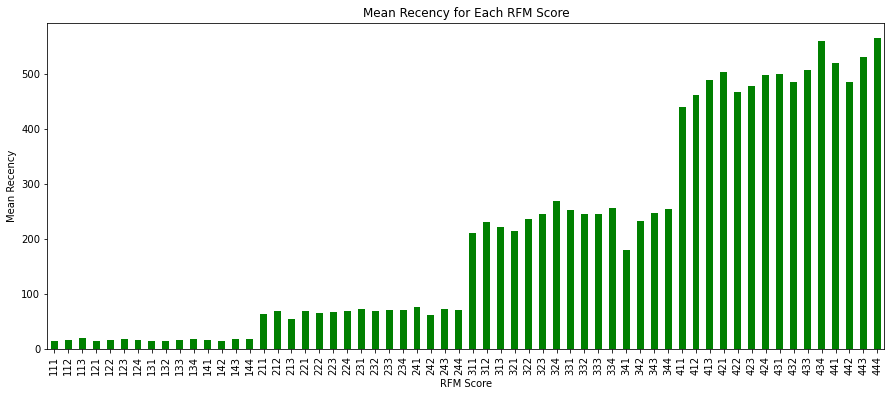

In [78]:
rfmSeg.groupby("RFM_score").agg("Recency").mean().plot(kind="bar",figsize = (15,6), color= "green")
plt.xlabel("RFM Score")
plt.ylabel("Mean Recency")
plt.title("Mean Recency for Each RFM Score")

Text(0.5, 1.0, 'Mean Frequency for Each RFM Score')

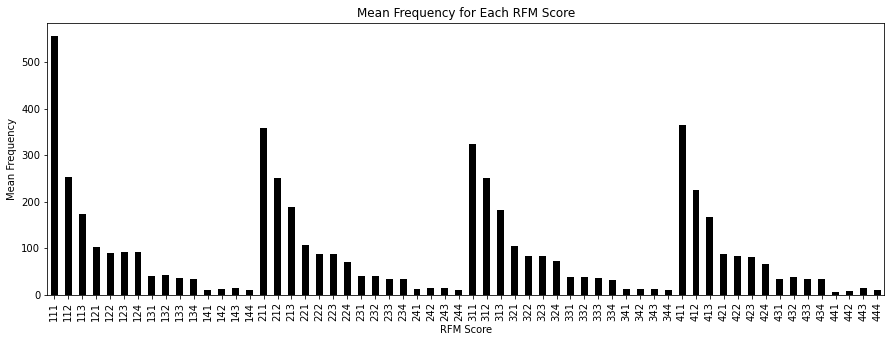

In [85]:
rfmSeg.groupby("RFM_score").agg("Frequency").mean().plot(kind="bar",figsize = (15,5), color= "black")
plt.xlabel("RFM Score")
plt.ylabel("Mean Frequency")
plt.title("Mean Frequency for Each RFM Score")

Text(0.5, 1.0, 'Mean Monetary for Each RFM Score')

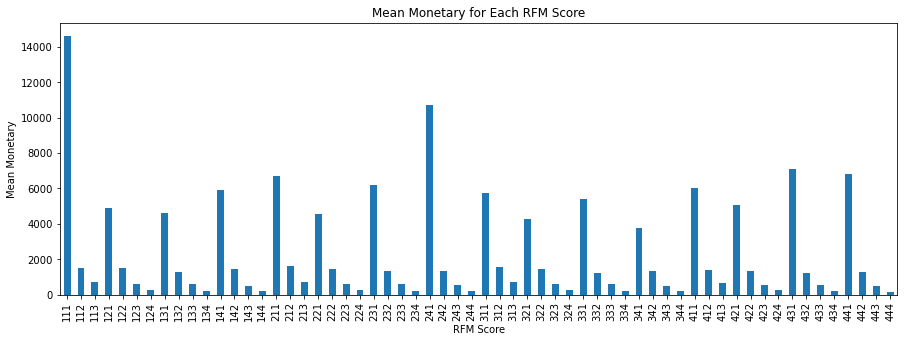

In [84]:
rfmSeg.groupby("RFM_score").agg("Monetary").mean().plot(kind="bar",figsize = (15,5))
plt.xlabel("RFM Score")
plt.ylabel("Mean Monetary")
plt.title("Mean Monetary for Each RFM Score")

## Visualization of groups using RFM scoring obtained by summation

In [90]:
rfmSeg["RFM Sum Score"] = rfmSeg.R_Quartile + rfmSeg.F_Quartile + rfmSeg.M_Quartile

In [91]:
rfmSeg

,Customer ID,Recency,Frequency,Monetary,K Mean cluster,R_Quartile,F_Quartile,M_Quartile,RFM_score,RFM Sum Score
0,12346,530,33,372.86,0,4,3,3,433,10
1,12347,40,242,5408.50,0,2,1,1,211,4
2,12348,76,51,2019.40,0,2,3,2,232,7
3,12349,19,175,4428.69,0,1,1,1,111,3
4,12350,311,17,334.40,0,3,4,4,344,11
...,...,...,...,...,...,...,...,...,...,...
5858,18283,10,936,2528.65,0,1,1,1,111,3
5859,18284,609,28,461.68,0,4,3,3,433,10
5860,18285,661,12,427.00,0,4,4,3,443,11
5861,18286,477,67,1296.43,0,4,2,2,422,8


Text(0.5, 1.0, 'Mean Recency for Each RFM Score')

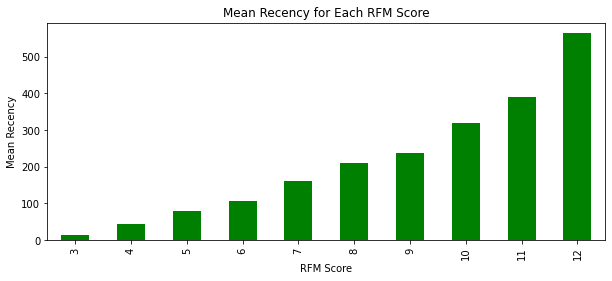

In [98]:
rfmSeg.groupby("RFM Sum Score").agg("Recency").mean().plot(kind="bar",figsize = (10,4) ,color= "green")
plt.xlabel("RFM Score")
plt.ylabel("Mean Recency")
plt.title("Mean Recency for Each RFM Score")

Text(0.5, 1.0, 'Mean Frequency for Each RFM Score')

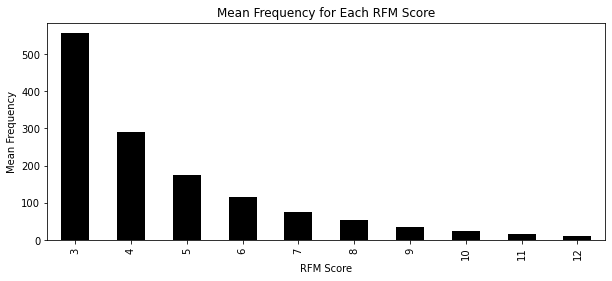

In [99]:
rfmSeg.groupby("RFM Sum Score").agg("Frequency").mean().plot(kind="bar",figsize = (10,4), color= "black")
plt.xlabel("RFM Score")
plt.ylabel("Mean Frequency")
plt.title("Mean Frequency for Each RFM Score")

Text(0.5, 1.0, 'Mean Monetary for Each RFM Score')

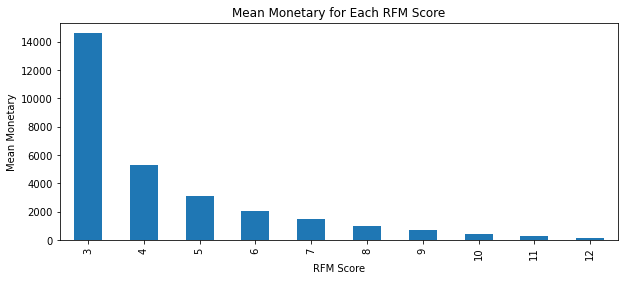

In [100]:
rfmSeg.groupby("RFM Sum Score").agg("Monetary").mean().plot(kind="bar",figsize = (10,4))
plt.xlabel("RFM Score")
plt.ylabel("Mean Monetary")
plt.title("Mean Monetary for Each RFM Score")